In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## drop month ,day and year
df.drop(['month',"day","year"],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding 
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## idependent and dependent features 
x=df.drop("FWI",axis=1)
y=df["FWI"]
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=46)

In [14]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [15]:
## feature selection based on correletion 
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664200,-0.227432,-0.365544,0.701898,0.505930,0.395096,0.631915,0.485323,0.568252,0.290454
RH,-0.664200,1.000000,0.251388,0.224790,-0.655190,-0.420065,-0.218859,-0.681260,-0.366245,-0.455925,-0.438079
Ws,-0.227432,0.251388,1.000000,0.068519,-0.127665,0.013627,0.091972,0.052470,0.046567,-0.034021,-0.141365
Rain,-0.365544,0.224790,0.068519,1.000000,-0.556449,-0.315234,-0.306458,-0.352920,-0.326402,-0.376482,-0.046009
FFMC,0.701898,-0.655190,-0.127665,-0.556449,1.000000,0.613460,0.496200,0.722575,0.604241,0.758138,0.267168
DMC,0.505930,-0.420065,0.013627,-0.315234,0.613460,1.000000,0.842873,0.669576,0.978800,0.589158,0.296313
DC,0.395096,-0.218859,0.091972,-0.306458,0.496200,0.842873,1.000000,0.461286,0.922489,0.488019,-0.016756
ISI,0.631915,-0.681260,0.052470,-0.352920,0.722575,0.669576,0.461286,1.000000,0.631280,0.715878,0.330350
BUI,0.485323,-0.366245,0.046567,-0.326402,0.604241,0.978800,0.922489,0.631280,1.000000,0.592531,0.187679
Classes,0.568252,-0.455925,-0.034021,-0.376482,0.758138,0.589158,0.488019,0.715878,0.592531,1.000000,0.246397


<Axes: >

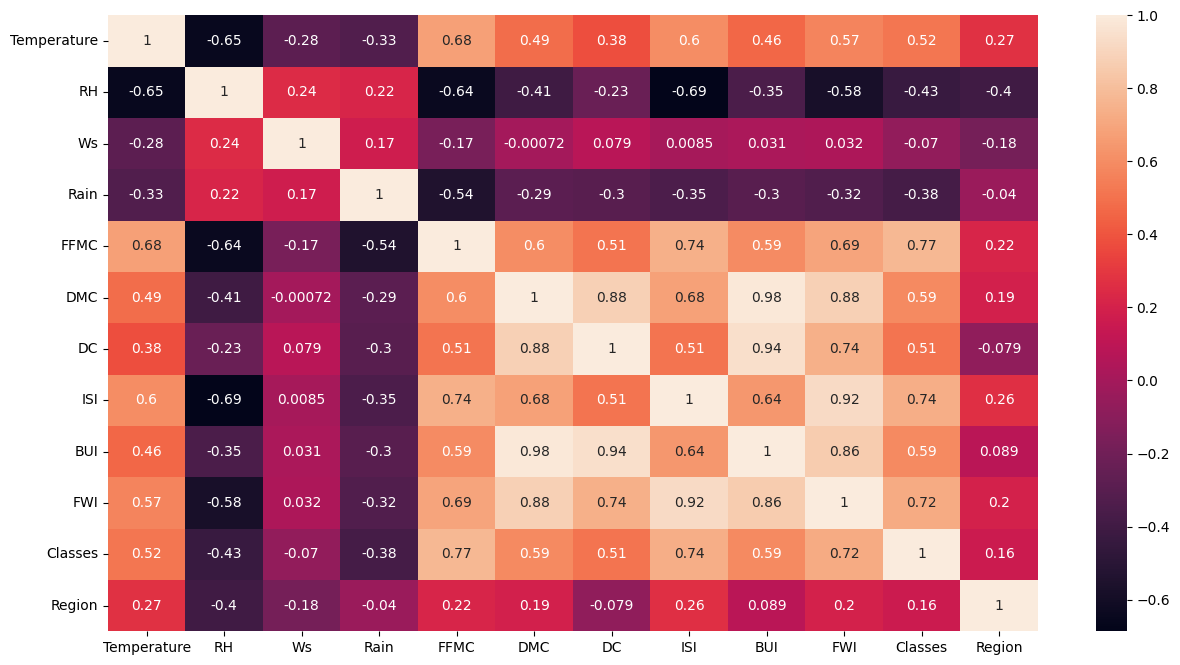

In [16]:
## check for multi collinearity
plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
## threshold --Domain Experties 
corr_features= correlation(x_train,0.80)

In [19]:
# drop features when correletion is more than 0.80
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

## Feature scaling or standerdization 

In [20]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
x_train_scaled =scalar.fit_transform(x_train) 
x_test_scaled = scalar.transform(x_test)

In [21]:
x_train_scaled

array([[-0.11905292, -0.96631281, -0.51148063, ..., -0.71366443,
        -1.16774842, -0.98907071],
       [-0.40045072,  0.1809519 ,  0.91517798, ...,  0.43994431,
         0.85634884, -0.98907071],
       [ 0.7251405 , -0.42642353, -1.22480994, ..., -0.73720747,
        -1.16774842, -0.98907071],
       ...,
       [ 0.16234489,  0.99078581, -0.51148063, ..., -0.52532015,
        -1.16774842, -0.98907071],
       [ 0.7251405 , -0.1564789 ,  0.55851333, ...,  0.48703038,
         0.85634884, -0.98907071],
       [ 1.28793611, -0.35893738, -1.58147459, ...,  0.08679877,
         0.85634884,  1.01105006]], shape=(182, 9))

## **Box Plots to understand Effect of standers scaller**

Text(0.5, 1.0, 'X train after scalling')

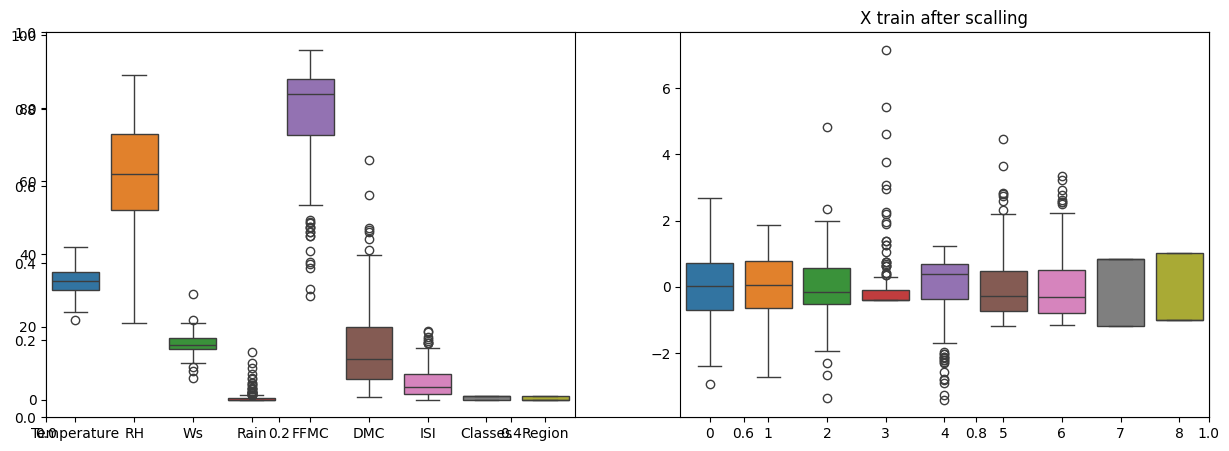

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("X train after scalling")


## **Linear Regression Model**

Mean Absolute Error : 0.7989707049015321
R2 Score :  0.9828269075084496


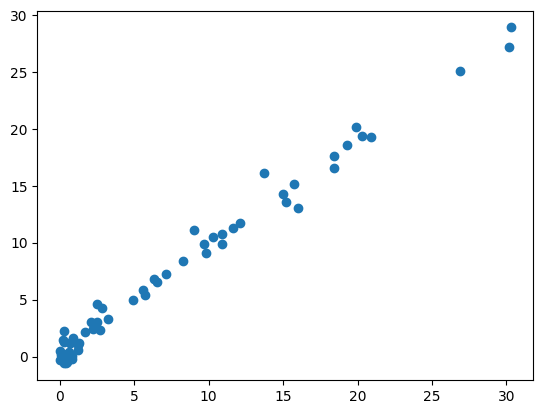

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

## **Lasso Regression**

Mean Absolute Error : 1.5548854767874751
R2 Score :  0.9335541661598643


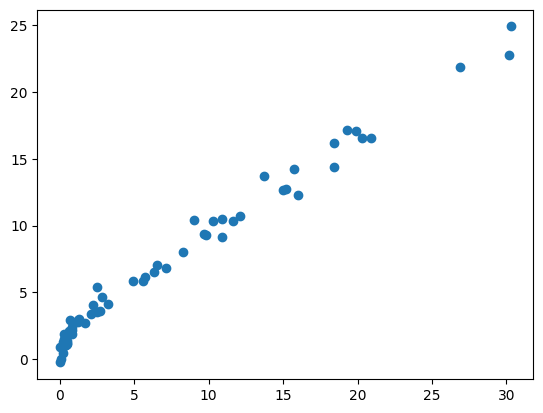

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Lasso=Lasso()
Lasso.fit(x_train_scaled,y_train)
y_pred = Lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

## **Cross Validation Lasso**

In [47]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [48]:
lassocv.alpha_

np.float64(0.03794766598491662)

In [49]:
lassocv.alphas_

array([6.6314624 , 6.18452403, 5.76770781, 5.37898361, 5.01645812,
       4.67836563, 4.36305944, 4.06900384, 3.7947666 , 3.53901203,
       3.30049446, 3.07805218, 2.87060177, 2.67713282, 2.49670302,
       2.3284336 , 2.17150497, 2.0251528 , 1.88866428, 1.76137463,
       1.64266387, 1.53195383, 1.42870526, 1.33241531, 1.24261498,
       1.15886689, 1.08076314, 1.00792332, 0.93999266, 0.8766403 ,
       0.81755768, 0.76245703, 0.71106998, 0.66314624, 0.6184524 ,
       0.57677078, 0.53789836, 0.50164581, 0.46783656, 0.43630594,
       0.40690038, 0.37947666, 0.3539012 , 0.33004945, 0.30780522,
       0.28706018, 0.26771328, 0.2496703 , 0.23284336, 0.2171505 ,
       0.20251528, 0.18886643, 0.17613746, 0.16426639, 0.15319538,
       0.14287053, 0.13324153, 0.1242615 , 0.11588669, 0.10807631,
       0.10079233, 0.09399927, 0.08766403, 0.08175577, 0.0762457 ,
       0.071107  , 0.06631462, 0.06184524, 0.05767708, 0.05378984,
       0.05016458, 0.04678366, 0.04363059, 0.04069004, 0.03794

In [50]:
lassocv.mse_path_

array([[42.16385834, 70.31749361, 59.68954911, 32.81058642, 47.41826354],
       [36.82181167, 70.31749361, 55.88729986, 28.65272735, 42.98107086],
       [32.19060868, 64.7426212 , 50.05354676, 24.97878644, 39.1480516 ],
       [28.16305636, 57.968921  , 44.93909466, 21.78930427, 35.83874412],
       [24.66050627, 52.02773734, 40.4529869 , 19.02074668, 32.98328609],
       [21.61456229, 46.28846136, 35.67175823, 16.61796549, 30.52102593],
       [18.96569862, 40.83970582, 31.43114895, 14.53294695, 28.3993156 ],
       [16.66218423, 36.07264279, 27.73277167, 12.72397879, 26.57246113],
       [14.65901465, 31.90095678, 24.50644304, 11.15476628, 25.00081034],
       [12.91706899, 28.2485681 , 21.6913298 ,  9.79387303, 22.78767811],
       [11.40226343, 25.04945984, 19.23447843,  8.6138671 , 20.2514538 ],
       [10.08501401, 22.24610461, 17.08955367,  7.5909431 , 18.06750559],
       [ 8.93957192, 19.78836607, 15.21694043,  6.70441281, 16.18809449],
       [ 7.9435433 , 17.63226022, 13.5

Mean Absolute Error : 0.8038174123345924
R2 Score :  0.9820615846991444


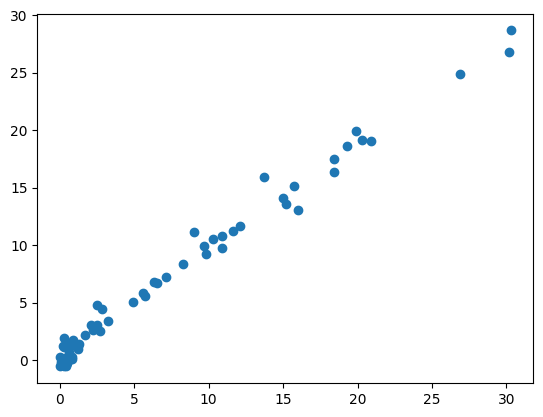

In [51]:
y_pred = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

## **Ridge Regression**

Mean Absolute Error : 0.8088706605957151
R2 Score :  0.9823700531409747


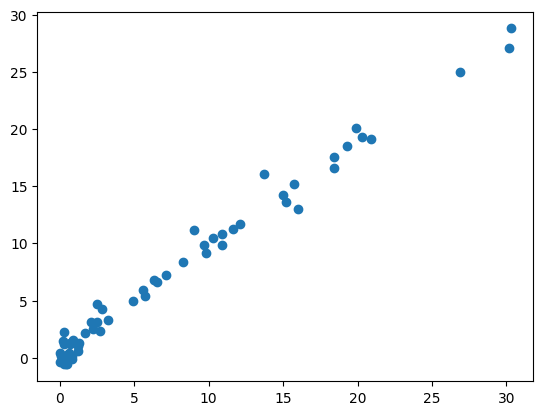

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge=Ridge()
Ridge.fit(x_train_scaled,y_train)
y_pred = Ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error : 0.8088706605957151
R2 Score :  0.9823700531409747


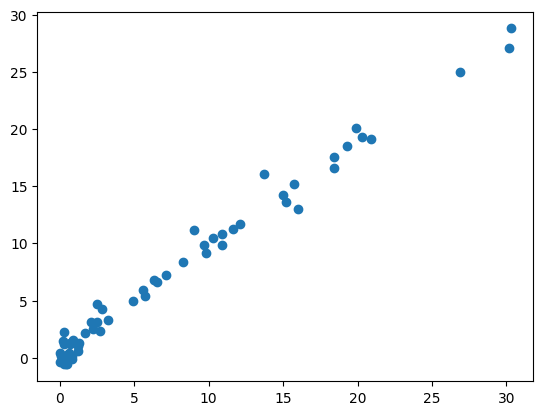

In [52]:
from sklearn.linear_model import RidgeCV
ridgecv =RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

In [53]:
ridgecv.alpha_

np.float64(1.0)

In [55]:
ridgecv.alphas

(0.1, 1.0, 10.0)

## **Elasticnet Regression**

Mean Absolute Error : 2.0501186283140065
R2 Score :  0.8766369741314818


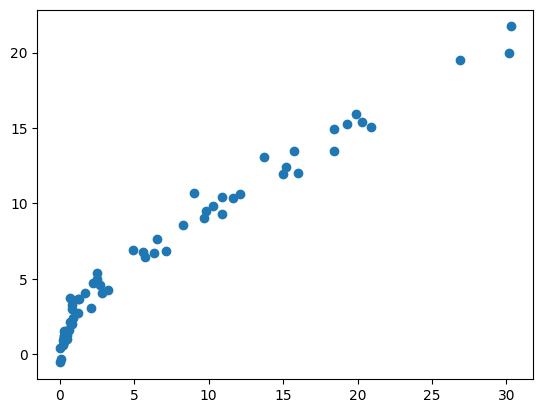

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error : 0.8167191746741141
R2 Score :  0.9817600814262316


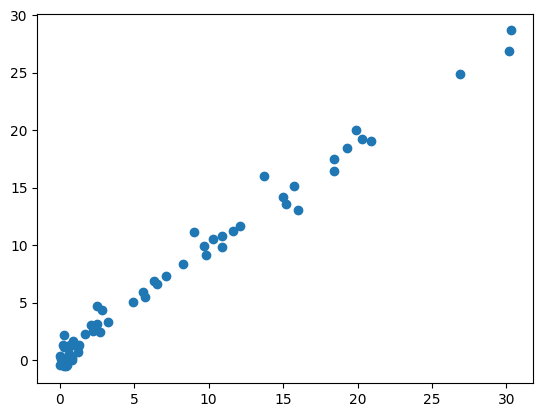

In [56]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv =ElasticNetCV(cv=5)
elasticnetcv.fit(x_train_scaled,y_train)
y_pred = elasticnetcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)